In [30]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [31]:
from sklearn.datasets import load_iris

In [32]:
iris=load_iris()
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [33]:
# check dataset type use

type(load_iris())

# view list of attributes used
dir(load_iris())

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [34]:
# np.c_ is numpy concatenate function 
# which is used to concat iris['data'] and iris['target'] arrays, binds the column on index.
# while np.r_ can be used to bind the rows; where the columns are of same dimensions
# for pandas column argument concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like...

data1= pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                   columns=iris['feature_names']+['target'])  

In [35]:
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [36]:
data1['species']=data1['target'].map({0:'Setosa',1:'Versicolor',2:'Virginica'})

In [37]:
data1.drop(columns='target',inplace=True)
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [38]:
data1['species'].value_counts()

Setosa        50
Virginica     50
Versicolor    50
Name: species, dtype: int64

Balanced Sample good for logistic regression

In [39]:
data1.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
data1.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

There are no nulls in any column of above data

In [41]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Except traget column all columns are in correct format that we except them to be in

In [42]:
# for double check
# data1['species']

###### Checking for duplicated rows

In [43]:
data1.loc[data1.duplicated(keep=False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
101,5.8,2.7,5.1,1.9,Virginica
142,5.8,2.7,5.1,1.9,Virginica


In [44]:
data1=data1.drop_duplicates()
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Removed one duplicated row which was same to other in all aspects

###### Replacing spaces to underscore in column names

In [45]:
data1.columns=data1.columns.str.replace(' ','_')

In [46]:
data1.columns

Index(['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)',
       'petal_width_(cm)', 'species'],
      dtype='object')

###### Plot univariate distribution

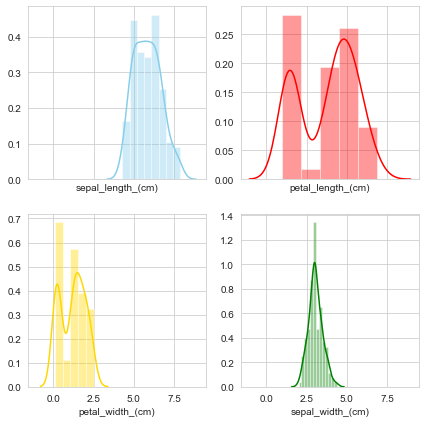

In [47]:
f,axes=plt.subplots(2,2,figsize=(7,7),sharex=True)
sns.distplot(data1['sepal_length_(cm)'],color='skyblue',ax=axes[0,0])
sns.distplot(data1['petal_length_(cm)'],color='red',ax=axes[0,1])
sns.distplot(data1['sepal_width_(cm)'],color='green',ax=axes[1,1])
sns.distplot(data1['petal_width_(cm)'],color='gold',ax=axes[1,0])

Variable look good to work for the small amount of data present, 
Normal Distribution is necessary because:
    -Most Algorithm have assumptions of data being normal
    -Most Variable when incorporated with large amount of data, 
    their original distribution tends to be Normal as per Central limit Theorem
    -Also Gaussian Variables do not change distribution on any array operation (add,multiplication), 
    there helpful in formulating algorithms output

###### Plotting pair Plot

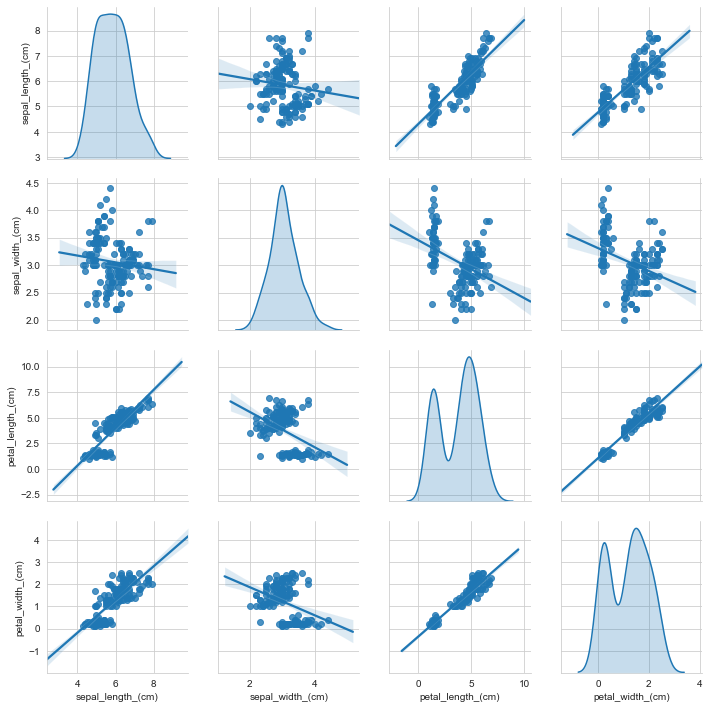

In [48]:
sns.pairplot(data1, vars=['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)','petal_width_(cm)'],
             diag_kind='kde',kind='reg')


In [49]:
corrplot=data1.corr()

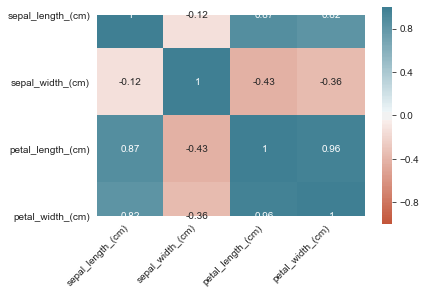

In [50]:
ax=sns.heatmap(corrplot,vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Above two charts draw are attention to the fact that there is positive relation between petal length and petal width,
negative relationship between sepal width and Petal dimensions and positive between sepal length  and petal dimensions.



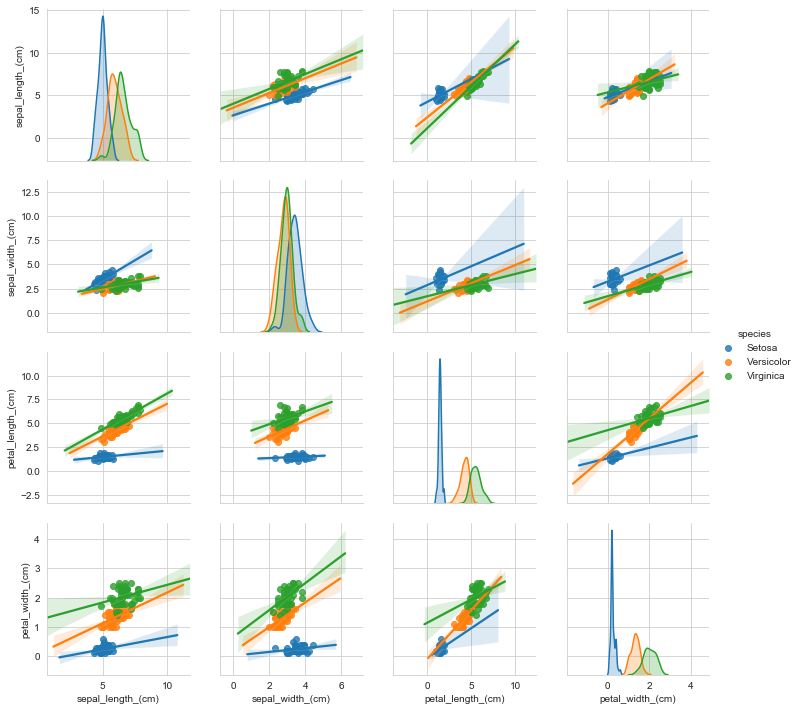

In [51]:
sns.pairplot(data1, vars=['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)','petal_width_(cm)'],
             diag_kind='kde',kind='reg',hue='species')


Setosa shows high frequency for smaller petal dimensions 

Its worthy to note that above relationship establishment might in to certain or all species.
If all species show same trend it is an established relation and those two variable column might be linearly related.
But chart above indicates that this might not be true as not all species show similar strong positivity or negativity in relation
We would plot correlation chart to check the magnitude of relation

We need to check overlap of features for different category types, lets check percentage overlap.
CDF can be useful when PDF does not help

In [52]:
data1_Setosa= data1[data1['species']=='Setosa']
data1_Versicolor= data1[data1['species']=='Versicolor']
data1_Virginica= data1[data1['species']=='Virginica']

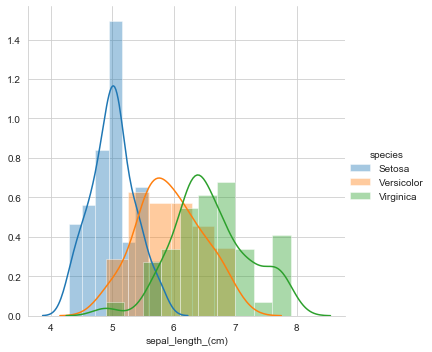

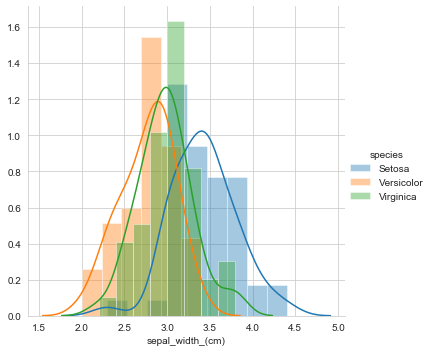

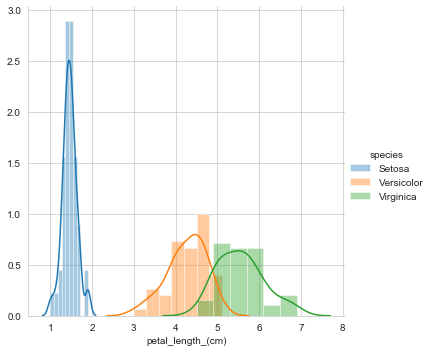

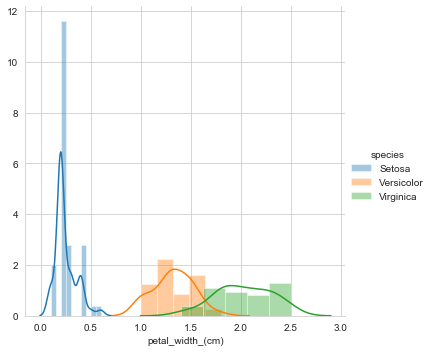

In [53]:
sns.FacetGrid(data1,hue='species',height=5)\
   .map(sns.distplot,'sepal_length_(cm)')\
   .add_legend();
sns.FacetGrid(data1,hue='species',height=5)\
   .map(sns.distplot,'sepal_width_(cm)')\
   .add_legend();
sns.FacetGrid(data1,hue='species',height=5)\
   .map(sns.distplot,'petal_length_(cm)')\
   .add_legend();
sns.FacetGrid(data1,hue='species',height=5)\
   .map(sns.distplot,'petal_width_(cm)')\
   .add_legend();
plt.show()

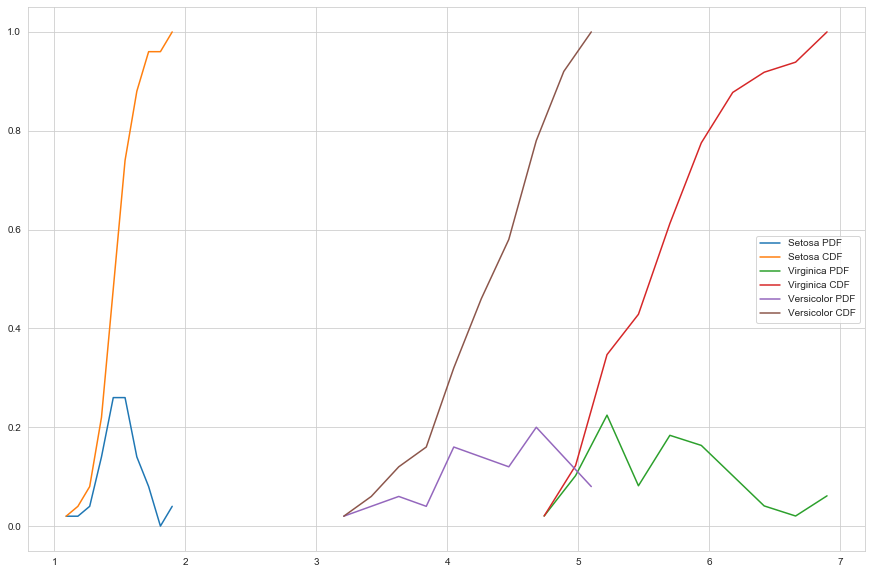

In [54]:
plt.figure(figsize=(15,10))

counts,bin_edges = np.histogram(data1_Setosa['petal_length_(cm)'],
                              bins = 10 , density =True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Setosa PDF')
plt.plot(bin_edges[1:],cdf,label='Setosa CDF')

counts,bin_edges = np.histogram(data1_Virginica['petal_length_(cm)'],
                              bins = 10 , density =True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Virginica PDF')
plt.plot(bin_edges[1:],cdf,label='Virginica CDF')

counts,bin_edges = np.histogram(data1_Versicolor['petal_length_(cm)'],
                              bins = 10 , density =True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Versicolor PDF')
plt.plot(bin_edges[1:],cdf,label='Versicolor CDF')

plt.legend()
plt.show()

Near about 95 % of the Versicolor flowers have petal length less than 5,
while about 10% of the Virginica flowers have petal length less than 5

This might be good to care about as this could lead to misclassification of Versicolor into Virginica 

In [55]:
print(count)

NameError: name 'count' is not defined

In [ ]:
data1.groupby('species').agg(['mean','median','std']).round(2)

At face data looks symmetrical, with less presence of outliers
It is evident that median (petal length and width) for setosa are significantly lower than the other two categories, with a lower std deviation than other two; it is left to check is this hypothesis true with entire data that petal_length less than 1.9 was in fact setosa

###### Box Plot

In [ ]:
no_of_columns=len(data1.columns)
no_of_rows=len(data1)
#multiple boxplots
plt.figure(figsize=(2*no_of_columns,5*no_of_rows))
for i in range(0,no_of_columns):
    if data1[data1.columns[i]].dtype == ('float64'):
        plt.subplot(no_of_rows+1,no_of_columns,i+1)      #plt.subplot(nrows,ncols,index)
        sns.set_style('whitegrid')
        sns.boxplot(data1[data1.columns[i]],color='green',orient='v')
        plt.tight_layout()

While all datapoints look like non outlier.
3 data points for sepal width lie outside the range(Q1-1.5*IQR,Q3+1.5*IQR) 

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='sepal_length_(cm)',data=data1)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='sepal_width_(cm)',data=data1)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='petal_length_(cm)',data=data1)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='petal_width_(cm)',data=data1)
plt.show()

When classification, it is good to get an estimate of various categories availale to us

In [ ]:
# q1=data1['sepal_width_(cm)'].quantile(0.25)
# q2=data1['sepal_width_(cm)'].quantile(0.5)
# q3=data1['sepal_width_(cm)'].quantile(0.75)
# iqr=q3-q1
# filt1=data1['sepal_width_(cm)']>(q3+1.5*iqr) 
# data1.loc[filt1,'sepal_width_(cm)']=data1.loc[filt]['sepal_width_(cm)']=(q3+1.5*iqr)
# filt2=data1['sepal_width_(cm)']<(q1-1.5*iqr) 
# data1.loc[filt2,'sepal_width_(cm)']=data1.loc[filt]['sepal_width_(cm)']=(q1-1.5*iqr)
# # data1.loc[filt2]


In this case we can take the approach of capping the the outlier to respective bounds 

In [ ]:
no_of_columns=len(data1.columns)
no_of_rows=len(data1)
#multiple boxplots
plt.figure(figsize=(2*no_of_columns,5*no_of_rows))
for i in range(0,no_of_columns):
    plt.subplot(no_of_rows+1,no_of_columns,i+1)      #plt.subplot(nrows,ncols,index)
    sns.set_style('whitegrid')
    
    sns.boxplot(data1[data1.columns[i]],color='green',orient='v')
    plt.tight_layout()

Now we dont have any outliers in data, and can move forward

###### Violin Plot

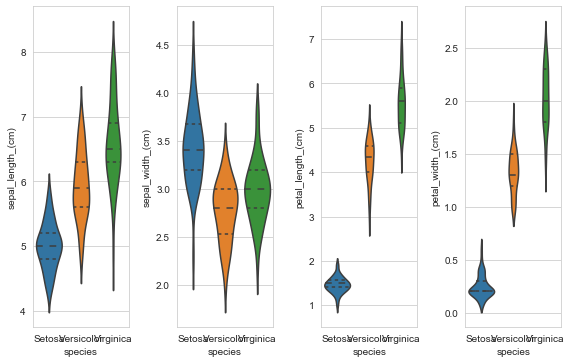

In [60]:

#multiple violinplots
plt.figure(figsize=(2*no_of_columns,5*no_of_rows))
for i in range(0,no_of_columns):
    if data1[data1.columns[i]].dtype == ('float64'):
        plt.subplot(no_of_rows,no_of_columns,i+1)      #plt.subplot(nrows,ncols,index)
        sns.set_style('whitegrid')

        sns.violinplot(x=data1['species'],y=data1[data1.columns[i]],inner='quartile',orient='v')
        plt.tight_layout()

## First Pass at some common Machine Learning algorithm

###### Algorithm 1-  Since this looks like a classification problem, 
Try Logistic Regression

In [61]:
X=data1.iloc[:,0:4]

In [68]:
y=data1.iloc[:, 4]

In [63]:
X= data1.iloc[:,0:4]
y= data1.loc[:,'species']

In [69]:
from sklearn.model_selection import train_test_split


#Split data into Train and test

X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print('There are {} samples in train set and {} samples in test dataset'.format(X_train.shape[0],X_test.shape[0]))

There are 104 samples in train set and 45 samples in test dataset


Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler    #MinMaxScaler when variable is uniform distribution(a,b) instead of normal dist
from sklearn.model_selection import cross_val_score

sc= StandardScaler()                                #MinMaxScaler(feature_range=(a,b))
sc.fit(X_train)

#below are scaled datasets to be used in algorithm
X_train_std= sc.transform(X_train)
X_test_std= sc.transform(X_test)


In [ ]:
from sklearn.svm import SVC      #Support Vector Classification

svm= SVC(kernel='rbf',random_state=0,gamma=0.1,C=1.0)
svm.fit(X_train_std,y_train)

print('The accuracy of the SVM classifier on training data is {:.2f}'.format(svm.score(X_train_std,y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(svm.score(X_test_std,y_test)))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier(n_neighbors = 7,p = 2, metric='minkowski')
knn.fit(X_train_std,y_train)

print('The accuracy of the SVM classifier on training data is {:.2f}'.format(knn.score(X_train_std,y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(knn.score(X_test_std,y_test)))

In [ ]:
pip install xgboost

In [ ]:
#Applying XGBoost
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train_std,y_train)

print('The accuracy of the SVM classifier on training data is {:.2f}'.format(xgb_clf.score(X_train_std,y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(xgb_clf.score(X_test_std,y_test)))

In [ ]:
#Applying Decision Tree
from sklearn import tree

#create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')

decision_tree.fit(X_train_std,y_train)

print('The accuracy of the SVM classifier on training data is {:.2f}'.format(decision_tree.score(X_train_std,y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(decision_tree.score(X_test_std,y_test)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train_std,y_train)
print('The accuracy of the SVM classifier on training data is {:.2f}'.format(random_forest.score(X_train_std,y_train)))
print('The accuracy of the SVM classifier on test data is {:.2f}'.format(random_forest.score(X_test_std,y_test)))